In [41]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [42]:
def get_fourier_transform(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    phase_spectrum = np.angle(fshift)
    
    return [magnitude_spectrum, phase_spectrum]

In [43]:
def return_image(img, magnitude, phase):
    f_ishift = np.fft.ifftshift(img)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(magnitude, phase)

(256, 256) (225, 225)


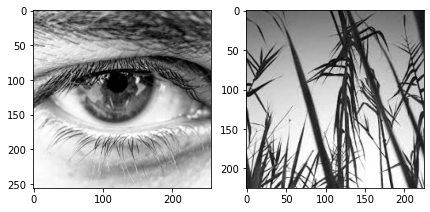

In [44]:
img1 = cv2.imread('oho.jpeg',0)
img2 = cv2.imread('planta.jpeg',0)
print(img1.shape, img2.shape)


plt.figure(figsize=(7,5))
plt.subplot(1,2,1)
plt.imshow(img1, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(img2, cmap = 'gray')
plt.show() 

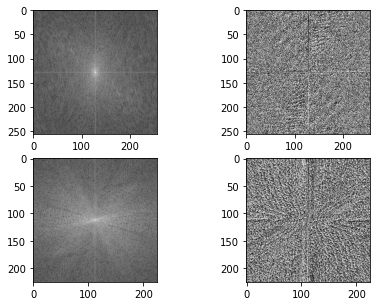

In [45]:
img1_fourier = get_fourier_transform(img1)
img2_fourier = get_fourier_transform(img2)

plt.figure(figsize=(7,5))
plt.subplot(2,2,1)
plt.imshow(img1_fourier[0], cmap = 'gray')
plt.subplot(2,2,2)
plt.imshow(img1_fourier[1], cmap = 'gray')
plt.subplot(2,2,3)
plt.imshow(img2_fourier[0], cmap = 'gray')
plt.subplot(2,2,4)
plt.imshow(img2_fourier[1], cmap = 'gray')
plt.show() 

In [46]:
img_return = return_image(img1, img1_fourier[0], img2_fourier[1])
plt.figure(figsize=(7,5))
plt.subplot(1,2,1)
plt.imshow(img_return, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(img_return, cmap = 'gray')
plt.show() 

error: OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/core/src/dxt.cpp:3508: error: (-215:Assertion failed) type == CV_32FC1 || type == CV_32FC2 || type == CV_64FC1 || type == CV_64FC2 in function 'dft'


In [ ]:
img1_float32 = np.float32(img1)
img2_float32 = np.float32(img2)

dft1 = cv2.dft(img1_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft2 = cv2.dft(img2_float32, flags = cv2.DFT_COMPLEX_OUTPUT)

dft_shift1 = np.fft.fftshift(dft1)
dft_shift2 = np.fft.fftshift(dft2)

f_ishift1 = np.fft.ifftshift(dft_shift1)
f_ishift2 = np.fft.ifftshift(dft_shift2)

img_back1 = cv2.idft(f_ishift1)
img_back2 = cv2.idft(f_ishift2)


img_back1 = cv2.magnitude(img_back2[:,:,0],img_back2[:,:,1])
img_back2 = cv2.magnitude(img_back1[:,:,0],img_back1[:,:,1])

plt.figure(figsize=(7,5))
plt.subplot(1,2,1)
plt.imshow(img_back1, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(img_back2, cmap = 'gray')
plt.show() 

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed